[logo placeholder]

## Flex Talk:  Topic Modeling
Week 6 | 4.3
***

## (2 Mins) - What do you know about topic modeling?

# Contrasting Use Cases

## Search Engines

Search Engines use a variety of natural language processing techniques in order to provide an accurate query interface to documents on the internet.  LDA is just one of the tools that is employed to help use this problem.



![](https://snag.gy/lbsuV2.jpg)

![](https://snag.gy/YdgxKz.jpg)

![](https://snag.gy/Ctr6OL.jpg)

![](https://snag.gy/ob9Um8.jpg)

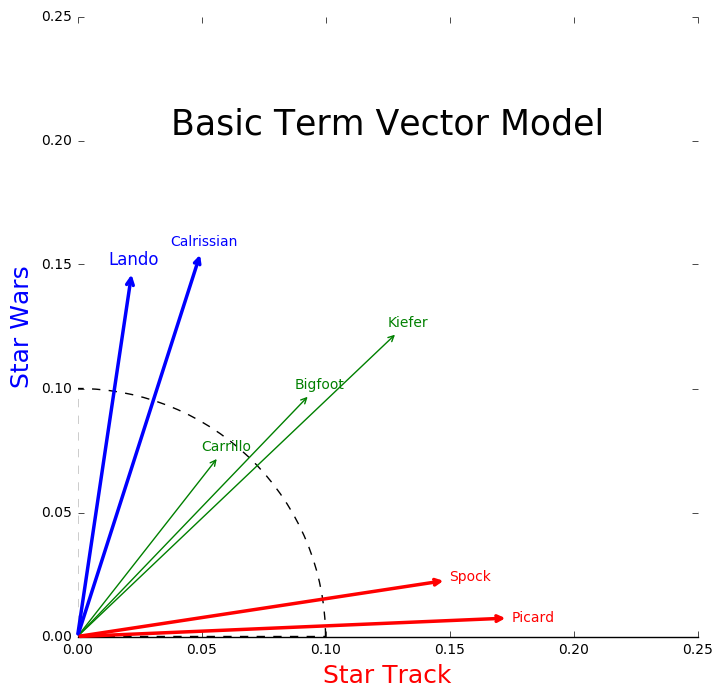

In [1]:
##### from scipy.interpolate import spline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.patches as patches
from matplotlib.path import Path

fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
theta1, theta2 = 0, 90
radius = .1
center = (0, 0)

# Main angle guide
w1 = Wedge(center, radius, theta1, theta2, fill=False, linestyle='dashed')
w1.set_linewidth(1)
ax.add_artist(w1)

# Vector examples
ax.annotate('Kiefer', (0, 0), (0.5, 0.5),
            arrowprops=dict(arrowstyle='<-', color="g"),
            xycoords='data', textcoords='axes fraction', color="g")

ax.annotate('Bigfoot', (0, 0), (0.35, 0.4),
            arrowprops=dict(arrowstyle='<-', color="g"),
            xycoords='data', textcoords='axes fraction', color="g")

ax.annotate('Carrillo', (0, 0), (0.2, 0.3),
            arrowprops=dict(arrowstyle='<-', color="g"),
            xycoords='data', textcoords='axes fraction', color="g")

ax.annotate('Calrissian', (0, 0), (0.15, 0.63),
            arrowprops=dict(arrowstyle='<-', color="b", linewidth=2.5),
            xycoords='data', textcoords='axes fraction', color="b")

ax.annotate('Lando', (0, 0), (0.05, 0.6),
            arrowprops=dict(arrowstyle='<-', color="b", linewidth=2.5),
            xycoords='data', textcoords='axes fraction', fontsize=12, color="b")

ax.annotate('Spock', (0, 0), (.6, 0.09),
            arrowprops=dict(arrowstyle='<-', color="r", linewidth=2.5),
            xycoords='data', textcoords='axes fraction', color="r")

ax.annotate('Picard', (0, 0), (.7, 0.025),
            arrowprops=dict(arrowstyle='<-', linewidth=2.5, color="r"),
            xycoords='data', textcoords='axes fraction', color="r")

# Remove splines on top and right
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
ax.set_ylim([0, .25])
ax.set_xlim([0, .25])
ax.set_xmargin(.001)
ax.set_ymargin(.001)
ax.set_autoscale_on(False)


# x = np.linspace(0, 2*np.pi, 100)
# plt.plot(x)
plt.title("Basic Term Vector Model", fontsize=25, position=(0.5, 0.8))
plt.ylabel("Star Wars", fontsize=18, color="b")
plt.xlabel("Star Track", fontsize=18, color="r")


plt.margins(0.005, 0.0001)

plt.show()

Each word in our corpus is related to either "Star Wars" or "Star Track".  We use a vector space model to calculate the distance of each word to each topic.

> Topics generated from an LDA model are actually a cluster of word probabilities, not clearly defined labels.  Simplifying word vectors like this, should give you a sense about the intuition of how **words vectors** relate to **topics**.

# How LDA Works
_Abridged Explanation_

![](https://snag.gy/aiSFrm.jpg)

LDA isn't exactly as straight forward as it sounds when it comes to the actual math.  We will attempt to explore this in more general terms.

## First, choose K topics

Kind of like KNN but we are deciding, up front, on a preset number of topics.



## Calculate Word / Topic Probabilities

![](https://snag.gy/yx9grm.jpg)

**For each possible topic Z, and each word:**
1. Multiply the frequency of the word by the total number of words already in topic Z

This gives us a probability that each word exists in the preset number of topics.

> The term here that is unfamilliar is a hyperparameter, *alpha*.  In this case, alpha is a scaler that helps minimize an error term.  Thankfully, most LDA models that are implented will set this automatically and it's usually, 95% of the time, a fine solution.  To really get a strong handle of the math behind this model, there are whitepapers you can read.  Also, having a strong handle on Bayesian statistis is a must to really grasp this model at it's lowest levels.  We are not going there today!

> One problem **alpha** solves is leaving the window of opportunity open when a word may only belong in a single topic, that doesn't exist in any others.

## LDA Intuition
 
Using the previous assumption about how words are assigned to topics, as we iterate through each word in our corpus, and assign to topics:

1. Words become more common in topics where they are already common.
1. Topics will become more common in documents where they are already common.

**With LDA**:
- Words are assigned to topics randomly at first
- As words are found to be consistently distributed within topics, the model achieves a sort of balance based on the distribution of words accross all documents.

## LDA Challenges

1. **There's a bit of entropy to topics.**
There can be between %1-10 shift in what is generated in LDA models.  You may not get the same thing 2x!

1. **Can be very difficult to assess.**
If you have a large corpus, with many topics (>10), it's damn near impossible to visualize the distribution of documents to topics.

1. **Preprocessing is heavy.**
To get the most out of LDA, cleaning stopwords, and specific language can be a challenging task.  Sometimes it's difficult to avoid the noise involved with this model.

1. **SME is necessary for accurate topic assessment.**
The more straight forward your text is, the less subject matter expertise is required.  A more advanced use of LDA would involve assessing documents with lots of idiomtic language. Knowing what topics are found, can be subjective.

1.  **Determining what topics mean, is tricky.**
A collection of world probabiltiies generally isn't very intuitive.  You could take the first word and use that as your topic "label".  Hence, subject matter expertise.

1. **LDA is unsupervised.**
It's not possible to know what is "correct".  The repsonse topics are generated, hence this is why LDA is known as a "generative" model. 

1. **Tuning your LDA model can be tough."**
With other unsupervised models, it's possible to tune for the parameter **K** *number of topics*, but it's not necessarily a very accurate method.  There are things you can do to assess the main paramter **K**.



## LDA Strengths

1. **It can be very strong performer in production.**
After you build the model, it can easily be used "online".
> "Online" training allows you to update your model with more training data without having to refit all your data.  Only new data can be fit globally.

1.  **It's easy to get a quick sense of what a large body of text is broadly "about", without having to read all of it.** Rather than reading 12k PDF's on corproate policies, you could extract the text, and run LDA to see what generalities it finds.
1.  **Easily classify / tag documents by topic.**
1.  **It can "just work" out of the box.**  However, your mileage will vary depending on your preprocessing.

## Other Types of LDA models

- Topics Over Time
- Dynamic Topic Modeling
- Hierarchical LDA
- Pachinko Allocation 

A cool new LDA model to look out for:

- LDA2Vec

## LDA Codealong!

We will now explore a brief walkthrough of a small collection of documents represented by a list.

In [2]:
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
import pandas as pd


doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."

# compile sample documents into a list
documents = [doc_a, doc_b, doc_c, doc_d, doc_e]
df        = pd.DataFrame(documents, columns=['text'])

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
df

,text
0,Brocolli is good to eat. My brother likes to e...
1,My mother spends a lot of time driving my brot...
2,Some health experts suggest that driving may c...
3,I often feel pressure to perform well at schoo...
4,Health professionals say that brocolli is good...


In [4]:
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

stops = stopwords.words()

In [5]:
type(stops)

list

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)
# custom_stop_words.append('mother')
# custom_stop_words.append('brother')

In [7]:
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(df['text'])


## Check out the tokens that were saved, after stopword removal.

Each token, has a value of it's feature offset in the internal matrix.

In [8]:
vectorizer.vocabulary_
# vectorizer.get_feature_names()

{u'baseball': 0,
 u'better': 1,
 u'blood': 2,
 u'brocolli': 3,
 u'brother': 4,
 u'cause': 5,
 u'drive': 6,
 u'driving': 7,
 u'eat': 8,
 u'experts': 9,
 u'feel': 10,
 u'good': 11,
 u'health': 12,
 u'increased': 13,
 u'likes': 14,
 u'lot': 15,
 u'mother': 16,
 u'perform': 17,
 u'practice': 18,
 u'pressure': 19,
 u'professionals': 20,
 u'say': 21,
 u'school': 22,
 u'spends': 23,
 u'suggest': 24,
 u'tension': 25,
 u'time': 26}

## Counts of tokens

What is being counted?

_Warning: big ugly sparse matrix ahead._

In [9]:
X.toarray()

array([[0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0]])

In [10]:
docs = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
docs.sum()

baseball         1
better           1
blood            1
brocolli         3
brother          3
cause            1
drive            1
driving          2
eat              2
experts          1
feel             1
good             3
health           3
increased        1
likes            1
lot              1
mother           3
perform          1
practice         1
pressure         2
professionals    1
say              1
school           1
spends           1
suggest          1
tension          1
time             1
dtype: int64

## Setup LDA Model!

First we setup the vocabulary.  We could do this in 1 of 2 ways.  The quick and dirty way is to build a dictionary with a keys representing the feature offset of the tokens in the matrix, with the tokens as values.

In [11]:
# This is the fastest way to swap a dictionary key / value order.  This is the format gensim LDA expects it's vocabulary.
vocab = {v: k for k, v in vectorizer.vocabulary_.iteritems()}
vocab

{0: u'baseball',
 1: u'better',
 2: u'blood',
 3: u'brocolli',
 4: u'brother',
 5: u'cause',
 6: u'drive',
 7: u'driving',
 8: u'eat',
 9: u'experts',
 10: u'feel',
 11: u'good',
 12: u'health',
 13: u'increased',
 14: u'likes',
 15: u'lot',
 16: u'mother',
 17: u'perform',
 18: u'practice',
 19: u'pressure',
 20: u'professionals',
 21: u'say',
 22: u'school',
 23: u'spends',
 24: u'suggest',
 25: u'tension',
 26: u'time'}

In [12]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'se... 'amoungst', 'yours', 'their', 'rather', 'without', 'so', 'five', 'the', 'first', 'whereas', 'once'],
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Default token mapping method
Otherwise, you can use this dictionary method that is much more standard for working with gensim models for the id2word parameter of the model.  

**Why would you use this instead?**

The main advantage is that this dictionary method allows for quick helper functions that allow you to quickly access common points of interest like tokens, token -> id mappings.  However, there are some performance advantages if you ever want to save your model to a file, then load it at a later time.  Because the tokenizations can take a while to be computed, you can save these post computed items to file, then load them from disk later which is quite a bit faster.  Also, it's possible to add new documents to your corpus without having to re-tokenize your entire set.  This is great for online systems that can take new documents on demmand.  

As you work with larger datasets with text, this is a much better way to handle LDA and other Gensim models from a performance point of view.

In [13]:
bow = []

for document in X.toarray():
    
    single_document = []
    
    for token_id, token_count in enumerate(document):

        if token_count > 0:
            single_document.append((token_id, token_count))

    bow.append(single_document)
    
bow

[[(3, 2), (4, 1), (8, 2), (11, 2), (14, 1), (16, 1)],
 [(0, 1), (4, 1), (7, 1), (15, 1), (16, 1), (18, 1), (23, 1), (26, 1)],
 [(2, 1), (5, 1), (7, 1), (9, 1), (12, 1), (13, 1), (19, 1), (24, 1), (25, 1)],
 [(1, 1), (4, 1), (6, 1), (10, 1), (16, 1), (17, 1), (19, 1), (22, 1)],
 [(3, 1), (11, 1), (12, 2), (20, 1), (21, 1)]]

In [14]:
# remove words that appear only once
frequency = defaultdict(int)

for text in documents:
    for token in text.split():
        frequency[token] += 1

texts = [[token for token in text.split() if frequency[token] > 1 and token not in stops]
          for text in documents]

# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)

# Create corpus matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [15]:
corpus

[[(0, 2), (1, 1), (2, 1)],
 [(1, 1), (2, 1), (3, 1), (4, 1)],
 [(3, 1)],
 [(2, 1), (4, 1)],
 [(0, 1)]]

## Setup the actual LDA model!
Finally we initialize and assign our model to a variable object!

In [16]:
lda = models.LdaModel(
    # matutils.Sparse2Corpus(X, documents_columns=False),
    # or use the corpus object created with the dictionary in the previous frame!
    corpus,
    id2word     =  dictionary,
    num_topics  =  3,
    passes      =  20,
    # id2word     =  vocab
    # or use the gensim dictionary object!

)


### Ok great, what now?!
Well let's look at the topics already!  These are the topics overall.


In [17]:
lda.print_topics(num_topics=3, num_words=5)

[(0, u'0.499*good + 0.201*My + 0.200*brother + 0.050*driving + 0.050*mother'),
 (1, u'0.202*driving + 0.201*brother + 0.200*My + 0.199*mother + 0.199*good'),
 (2, u'0.270*mother + 0.270*brother + 0.269*driving + 0.153*My + 0.039*good')]

This is how each document scored per topic:

In [26]:
lda.get_document_topics(bow[0])

IndexError: index 8 is out of bounds for axis 1 with size 5

Lets make it pretty!

## Lets come up with some high level labels
This is the subjective part of LDA.  What do the word probabilties that represent topics mean?  Let's make some up.

In [ ]:
topics_labels = {
   0: "Family Stress",
   1: "Driving",
   2: "Food"
}

In [ ]:
%matplotlib inline

In [ ]:
import seaborn as sns

doc_topics = [lda.get_document_topics(doc) for doc in corpus]

doc_topic_probabilities = []

for document in doc_topics:
    
    single_document = []
    
    for topic, probablity in document:
        
        single_document.append(probablity)
        
    doc_topic_probabilities.append(single_document)
    
docs_topics = pd.DataFrame(doc_topic_probabilities)
sns.heatmap(docs_topics)


# doc_topic_probabilities

In [ ]:
doc_topics = [lda.get_document_topics(doc) for doc in corpus]

topic_data = []

for document_id, topics in enumerate(doc_topics):
    
    document_topics = []
    
    for topic, probability in topics:
       
        topic_data.append({
            'document_id':  document_id,
            'topic_id':     topic,
            'topic':        topics_labels[topic],
            'probability':  probability
        })

topics_df = pd.DataFrame(topic_data)
topics_df.pivot_table(values="probability", index=["document_id", "topic"]).T

In [ ]:
# pd.DataFrame()
[(topic, probability) for topic, probability in doc_topics]

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

lda = LatentDirichletAllocation(n_topics=3)
lda.fit(X)

print("\nTopics in LDA model:")
tf_feature_names = vectorizer.get_feature_names()
# print_top_words(lda, tf_feature_names, 10)

print lda.score(X)

## So what now!?

Well, this is a very basic example.  LDA typically doesn't perform well on very small datasets.  It can be useful to see how it works and to implement, but you should try to see how it behaves on your own.  Finding the optimal number of topics can be tricky.

Generally, you should consider:
- How well topics are applied to documents overall
- The strength of topics overall, to all documents
- Improving preprocessing such as stopword removal
- Building a nice web interface to explore your documents (see: [LDAExplorer](https://github.com/dyerrington/LDAExplorer), and [pyLDAvis](https://github.com/bmabey/pyLDAvis/blob/master/README.rst))

These general guidelines should help you tune your hyperparameter **K** for number of topics.

# (?? ~ Mins) Independant Practice
It's time to try this on your own or with a group!

For this practice, you will be working with the 20 newsgroup dataset from skelarn.datasets, which has a collection of newsgroup discussions.  

### Load up the 20 newsgroup dataset from sklearn.datasets
This could take a little while.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()

In [ ]:
news.keys()

In [ ]:
# Allow me to setup a dataframe
news_df = pd.DataFrame(news['data'], columns=["text"])
news_df['file'] = news['filenames']
news_df.head()

## 1. Pull out the newsgroup name from the "file" column, assign to new feature called "newsgroup"
Within the filepath variable, contains a newsgroup string that will be useful for filtering.  

In [ ]:
# Here is an example of a single filepath.  The newsgroup this belongs to is "rec.autos".
news_df['newsgroup'] = news_df['file'].map(lambda file: file.split("/")[-2])

## 2. Select a single newsgroup topic to setup and perform LDA

In [ ]:
subset_df = news_df[news_df['newsgroup'] == "talk.politics.mideast"]

# number of topics
k     =  10

# Vectorize
vectorizer  =  CountVectorizer(stop_words='english')
X           =  vectorizer.fit_transform(subset_df['text'])

# This is the fastest way to swap a dictionary key / value order.  This is the format gensim LDA expects it's vocabulary.
vocab = {v: k for k, v in vectorizer.vocabulary_.iteritems()}
vocab

# model
lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    # or use the corpus object created with the dictionary in the previous frame!
    # corpus, 
    num_topics  =  k,
    passes      =  10,
    id2word     =  vocab
    # or use the gensim dictionary object!
    # id2word     =  dictionary
)


## 3. Examine the topics that are found

In [ ]:
lda.print_topics(num_topics=k, num_words=5)

## 4. Adjust your number of topics parameter
A strong clue to get the K parameter just right, is to see how word probabilities overlap.  Sometimes you'll see duplicate topics occur so you should reduce the number until they no longer overlap.  There are some downsides to this approach but it's a quick and easy first pass until you can take a deeper look at everything.

## 5. Of the topics, how are they distributed across your documents?
Plot a histogram of a few of the topics to see how they are spread.  Do any dominate?  Are few represented?

One of the toughest questions to examine is how relevent the documents content is to the actual topics.  The latent characteristics may be present, but not understood fully.  There is a real risk of going down the rabbit hole and tweaking the model excessively (remember, 4+ months were spent iterating on Rapstats).

In [ ]:
# lda.get_document_topics(X[0].toarray())

# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)

# Create corpus matrix
# corpus = [dictionary.doc2bow(text) for text in texts]
# corpus[0]

# [val for index, val in enumerate(row) for row in X.toarray()[:10]]

# transform sparse matrix into gensim corpus
corpus = matutils.Sparse2Corpus(X, documents_columns=True)



In [ ]:
corpus.sparse.

## 6. Can you further clean your newsgroup text?

Look at those blasted subject headers and crap in the first lines of the messages.  Can you think of any ways to get rid of some of the more common terms?  Hint:  Remove items that only occur once, or too frequently.

## 7. Implement TFIDF vectorizer instead of count vectorizer.

How does this compare?  Does this improve the quality of results?